This is the notebook used to run the streamlit app for model inference. For details regarding how to run this notebook you can follow this  [YouTube Video](https://youtu.be/4uVOv9feB_0?si=q57zYiRwOLiWILw5).
The folders containing model weights was shared separately. And are being accessed by using google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 2s 2s/step


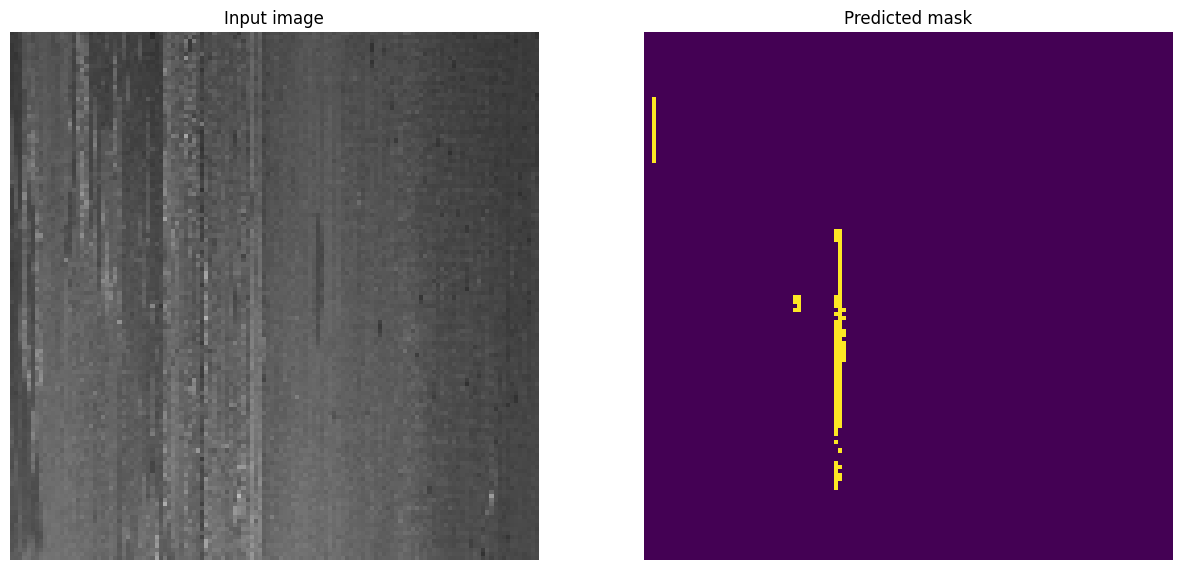

Type defect:  3


In [ ]:
# EXAMPLE INFERENCE

import matplotlib.pyplot as plt
import numpy as np


# Load the classification model
from keras.models import load_model
classification_model = load_model("/content/drive/MyDrive/Steel_defect/classification_model.tf")

# Load the segmentation model
from keras.models import load_model
segmentation_model = load_model("/content/drive/MyDrive/Steel_defect/segmentation_model.tf")

# Define a function for displaying test results
def display_test(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input image', 'Predicted mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

# Input your own image file
image_path = "/content/drive/MyDrive/Steel_defect/images/0000f269f.jpg"

input_shape = (128,128)

# Load the image using OpenCV
import cv2
sample_image = cv2.imread(image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, input_shape)


# Perform inference
# Segmentation inference
prediction = segmentation_model.predict(sample_image[np.newaxis, ...])[0]
predicted_mask = (prediction > 0.5).astype(np.uint8)

# Classification inference
prediction_class = classification_model.predict(sample_image[np.newaxis, ...])[0]

display_test([sample_image, predicted_mask])
print("Type defect: ", np.argmax(prediction_class))

In [ ]:
!pip install streamlit

In [3]:
!pip install pyngrok

If you want to run the streamlit app on your lcoal machine you can create a new file named app.py containing code of the cell below(after %%writefile app.py
 only). Then go to your terminal and type run app.py to run it on your local machine.

In [4]:
%%writefile app.py

import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import load_model

# Load the classification model
classification_model = load_model("/content/drive/MyDrive/Steel_defect/classification_model.tf")

# Load the segmentation model
segmentation_model = load_model("/content/drive/MyDrive/Steel_defect/segmentation_model.tf")

# Define a function for displaying test results with Matplotlib
def display_test(display_list):
    fig, axes = plt.subplots(1, len(display_list), figsize=(15, 15))
    title = ['Input image', 'Predicted mask']
    for i in range(len(display_list)):
        axes[i].imshow(display_list[i])
        axes[i].set_title(title[i])
        axes[i].axis('off')
    st.pyplot(fig)

# Streamlit app
st.title("Steel Defect Detection")

# Upload image
image_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if image_file:
    sample_image = cv2.imdecode(np.frombuffer(image_file.read(), np.uint8), cv2.IMREAD_COLOR)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    input_shape = (128, 128)
    sample_image = cv2.resize(sample_image, input_shape)

    # Perform inference
    # Segmentation inference
    prediction = segmentation_model.predict(sample_image[np.newaxis, ...])[0]
    predicted_mask = (prediction > 0.5).astype(np.uint8)

    # Classification inference
    prediction_class = classification_model.predict(sample_image[np.newaxis, ...])[0]

    display_test([sample_image, predicted_mask])
    st.write("Type defect: ", np.argmax(prediction_class))






Writing app.py


In the cell below you will have to paste your own ngrok authtoken id. To do this visit [ngrok.com](https://ngrok.com) and create your account, then go to your dashboard and click on Your Authtoken tab and copy your Authtoken and paste it in the cell below after !ngrok authtoken ...

In [5]:
!ngrok authtoken 2XRW13Vk0Sx8j1wmPpUEnctoZ8Q_3rqs5iAtYCxRnfaYiihtg

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [6]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-11-04 11:04:37--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  68.4MB/s    in 0.2s    

2023-11-04 11:04:37 (68.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [7]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [8]:
get_ipython().system_raw('./ngrok http 8501 &')


First execute all the cell in order then to visit the streamlit model interface click on the link generated by the cell below while making sure that the last cell of this notebook ie. the cell 2 cells below is still running.

In [9]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://50ac-34-85-187-65.ngrok-free.app


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.187.65:8501

2023-11-04 11:05:11.900296: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 11:05:11.900380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 11:05:11.900419: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 11:05:11.912338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruction